<a href="https://colab.research.google.com/github/prajaktapawar1234567/Deep-Learning-Assignments/blob/master/CNN_example_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print(x_train.shape)

170508288/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3)


In [2]:
y_train.shape

(50000, 1)

In [3]:
# printing the number of samples in x_train, x_test, y_train, y_test
print("Initial shape or dimensions of x_train", str(x_train.shape))

print ("Number of samples in our training data: " + str(len(x_train)))
print ("Number of labels in our training data: " + str(len(y_train)))
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)))
print()
print ("Dimensions of x_train:" + str(x_train[0].shape))
print ("Labels in x_train:" + str(y_train.shape))
print()
print ("Dimensions of x_test:" + str(x_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

Initial shape or dimensions of x_train (50000, 32, 32, 3)
Number of samples in our training data: 50000
Number of labels in our training data: 50000
Number of samples in our test data: 10000
Number of labels in our test data: 10000

Dimensions of x_train:(32, 32, 3)
Labels in x_train:(50000, 1)

Dimensions of x_test:(32, 32, 3)
Labels in y_test:(10000, 1)


In [4]:
# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Getting our date in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our date thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols,3)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols,3)

# store the shape of a single image 
input_shape = (img_rows, img_cols,3)

# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
from keras.utils import np_utils

# Now we one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of Classes: 10


In [6]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [7]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
#from keras.optimizers import SGD 

# create model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'SGD',
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 9, 64)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 9, 9, 64)          0         
                                                                 
 flatten (Flatten)           (None, 5184)              0         
                                                                 
 dense (Dense)               (None, 128)               663680    
                                                        

In [8]:
batch_size = 32
epochs = 10
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                   validation_data = (x_test,y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
1563/1563 [==============================] - 166s 106ms/step - loss: 2.0647 - accuracy: 0.2456 - val_loss: 1.8315 - val_accuracy: 0.3242
Epoch 2/10
1563/1563 [==============================] - 162s 103ms/step - loss: 1.7283 - accuracy: 0.3809 - val_loss: 1.5326 - val_accuracy: 0.4562
Epoch 3/10
1563/1563 [==============================] - 162s 103ms/step - loss: 1.5427 - accuracy: 0.4428 - val_loss: 1.3750 - val_accuracy: 0.5202
Epoch 4/10
1563/1563 [==============================] - 166s 106ms/step - loss: 1.4379 - accuracy: 0.4868 - val_loss: 1.3028 - val_accuracy: 0.5411
Epoch 5/10
1563/1563 [==============================] - 163s 104ms/step - loss: 1.3604 - accuracy: 0.5140 - val_loss: 1.2610 - val_accuracy: 0.5495
Epoch 6/10
1563/1563 [==============================] - 162s 103ms/step - loss: 1.3019 - accuracy: 0.5364 - val_loss: 1.2715 - val_accuracy: 0.5474
Epoch 7/10
1563/1563 [==============================] - 161s 103ms/step - loss: 1.2457 - accuracy: 0.5600 - val_

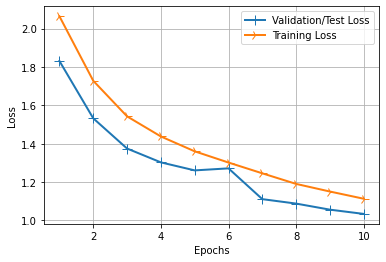

In [9]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()